In [1]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt
import math


In [2]:
env=gym.make('CartPole-v1')

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


(array([ 0.01803823,  0.14935869, -0.02892846, -0.30046365], dtype=float32),
 1.0,
 False,
 False,
 {})

In [3]:
#setting granulating indices
g_0=30#for cart position
g_1=10#for cart velocity
g_2=60#for pole angle
g_3=60#for pole angular velocity


In [4]:
def discrete(state):
    r=[0]*4
    #state[0]
    if state[0]<=-4.8:
        r[0]=0
    elif state[0]>=4.8:
        r[0]=g_0
    else:
        for i in range(g_0):
            if state[0]>(-4.8+i*(9.6/g_0)) and state[0]<=(-4.8+(i+1)*(9.6/g_0)):
                r[0]=i+1
    #state[1]
    if state[1]<=-2:
        r[1]=0
    elif state[1]>=2:
        r[1]=g_1
    else:
        for i in range(g_1):
            if state[1]>(-2+i*(4/g_1)) and state[1]<=(-2+(i+1)*(4/g_1)):
                r[1]=i+1
    #state[2]
    if state[2]<=-0.418:
        r[2]=0
    elif state[2]>=0.418:
        r[2]=g_2
    else:
        for i in range(g_2):
            if state[2]>(-0.418+i*(0.836/g_2)) and state[2]<=(-0.418+(i+1)*(0.836/g_2)):
                r[2]=i+1
    #state[3]
    if state[3]<=-1:
        r[3]=0
    elif state[3]>=1:
        r[3]=g_3
    else:
        for i in range(g_3):
            if state[3]>(-1+i*(2/g_3)) and state[3]<=(-1+(i+1)*(2/g_3)):
                r[3]=i+1 
    return r

    
    

In [5]:
g_4=env.action_space.n#2
qtable=np.zeros((g_0+1,g_1+1,g_2+1,g_3+1,g_4))

[[[[[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   ...

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]]


  [[[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   ...

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

In [6]:
#parameters
episodes=1000
iterations=10
alpha=0.5
d=1
minimum=0


In [7]:
avgr = [0] * iterations

for iter in range(iterations):
    qtabletemp = qtable.copy()  # Create a copy of the Q-table
    c = 0
    
    for epi in range(episodes):
        state, inf = env.reset()
        done = False
        state = discrete(state)

        ep = 1 / (iter + 1)

        while not done:
            if np.random.uniform(0, 1) < ep:
                action = env.action_space.sample()
            else:
                action = np.argmax(qtable[state[0], state[1], state[2], state[3]])

            newstate, reward, term, trunc, info = env.step(action)
            c += reward
            newstate = discrete(newstate)

            done = trunc or term
            qtabletemp[state[0], state[1], state[2], state[3], action] = (1 - alpha) * qtabletemp[state[0], state[1], state[2], state[3], action] + alpha * (
                    reward + d * np.max(qtabletemp[newstate[0], newstate[1], newstate[2], newstate[3]]))
            state = newstate

    c = c / episodes
    avgr[iter] = c

    qtable = qtabletemp.copy()  # Update the original Q-table with the values from the temporary copy

print(avgr)


[22.697, 20.899, 28.411, 41.854, 51.799, 93.511, 224.805, 233.444, 285.784, 305.726]


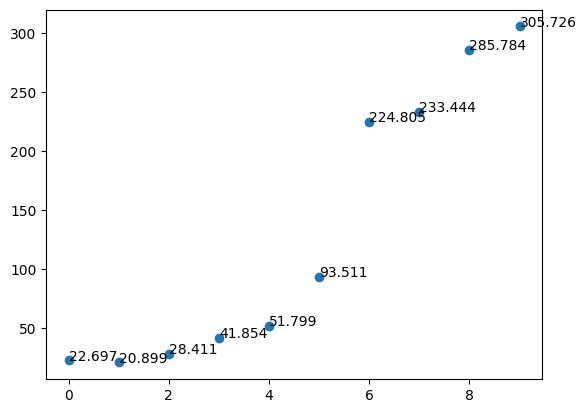

In [8]:
x=[i for i in range (iterations)]
plt.scatter(x,avgr)
for i in range (iterations):
    plt.annotate(avgr[i],(x[i],avgr[i]))

plt.show()